TUGAS TOPIK 4

Muhammad Naufal Rabbani - 1301218698

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('2.csv', header=None)

Data_Kolom_2 = data.iloc[:, 1]
Data_Kolom_2.head(10)

0    1984
1    1984
2    1987
3    1990
4    1992
5    1987
6    1980
7    1979
8    1984
9    1992
Name: 1, dtype: int64

# 1. Plot raw data dan bandingkan dengan Filter LPF dan MVA.

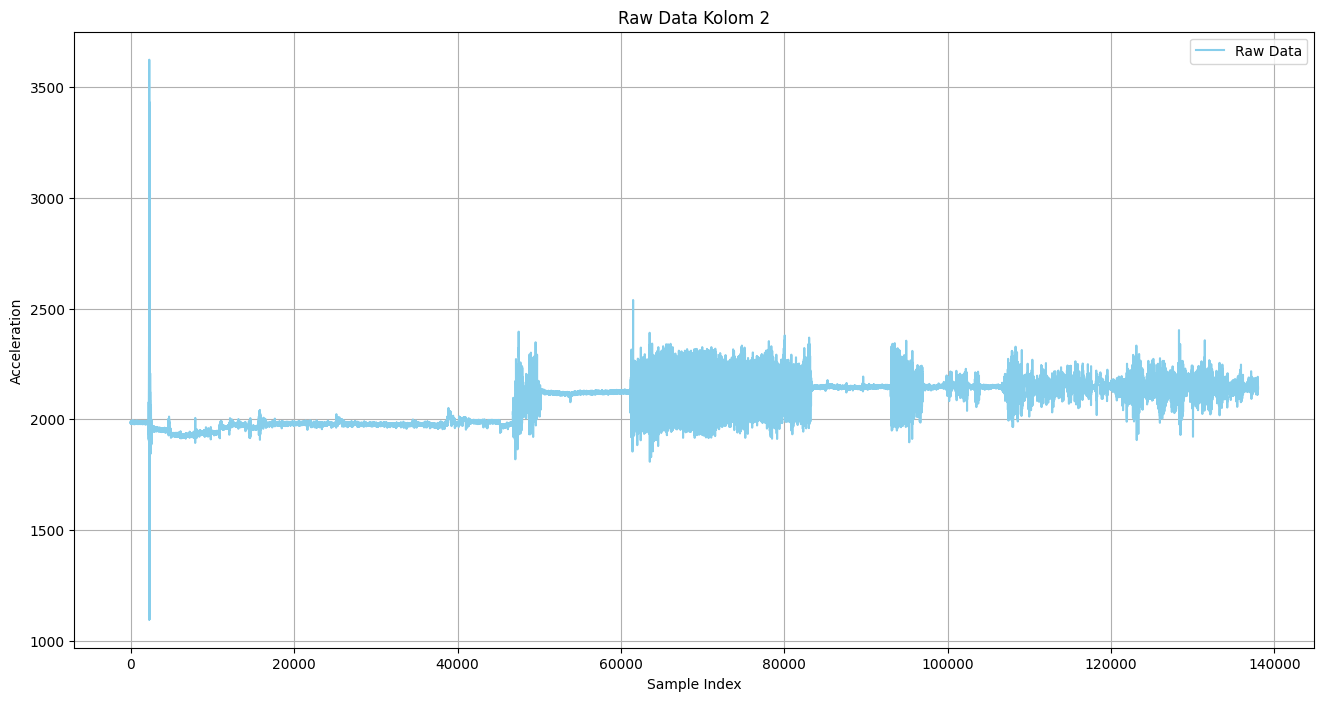

In [75]:
plt.figure(figsize=(16, 8))
plt.plot(Data_Kolom_2, label="Raw Data", color="skyblue")
plt.xlabel("Sample Index")
plt.ylabel("Acceleration")
plt.title("Raw Data Kolom 2")
plt.legend()
plt.grid(True)
plt.show()

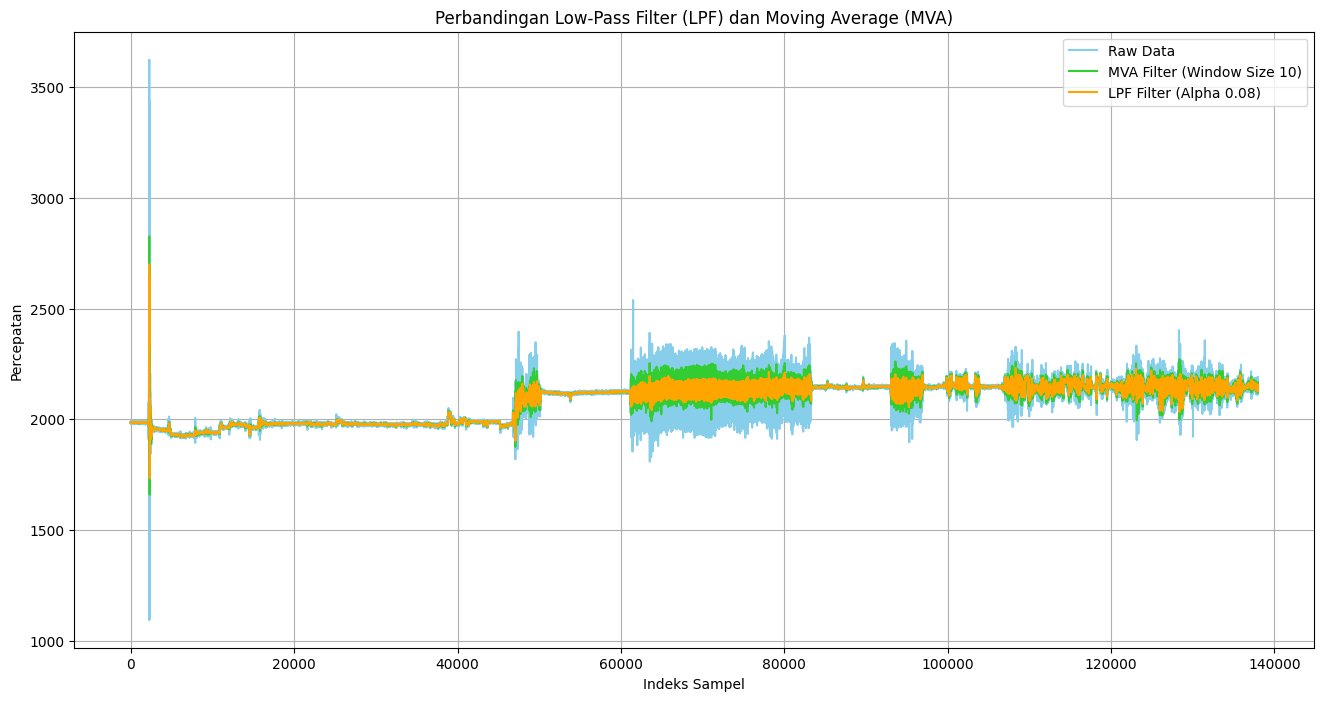

In [110]:
alpha = 0.08  # LPF Filter
window_size = 10 # MVA Filter

# MVA Filter
mva_filtered = Data_Kolom_2.rolling(window=window_size, min_periods=1).mean()

# LPF Filter
lpf_filtered = [Data_Kolom_2[0]]
for i in range(1, len(Data_Kolom_2)):
    lpf_filtered.append(alpha * Data_Kolom_2[i] + (1 - alpha) * lpf_filtered[-1])
lpf_filtered = np.array(lpf_filtered)

# Plot perbandingan data
plt.figure(figsize=(16, 8))
plt.plot(Data_Kolom_2, label="Raw Data", color="skyblue")
plt.plot(mva_filtered, label=f"MVA Filter (Window Size {window_size})", color="limegreen")
plt.plot(lpf_filtered, label=f"LPF Filter (Alpha {alpha})", color="orange")
plt.xlabel("Indeks Sampel")
plt.ylabel("Percepatan")
plt.title("Perbandingan Low-Pass Filter (LPF) dan Moving Average (MVA)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Frekuensi Cut-Off (fc) berapa yang digunakan untuk LPF? Bagaimana menentukan nilai fc tersebut? (harap sertakan plot data yang difilter terkait dengan frekuensi pemotongan yang Anda gunakan)

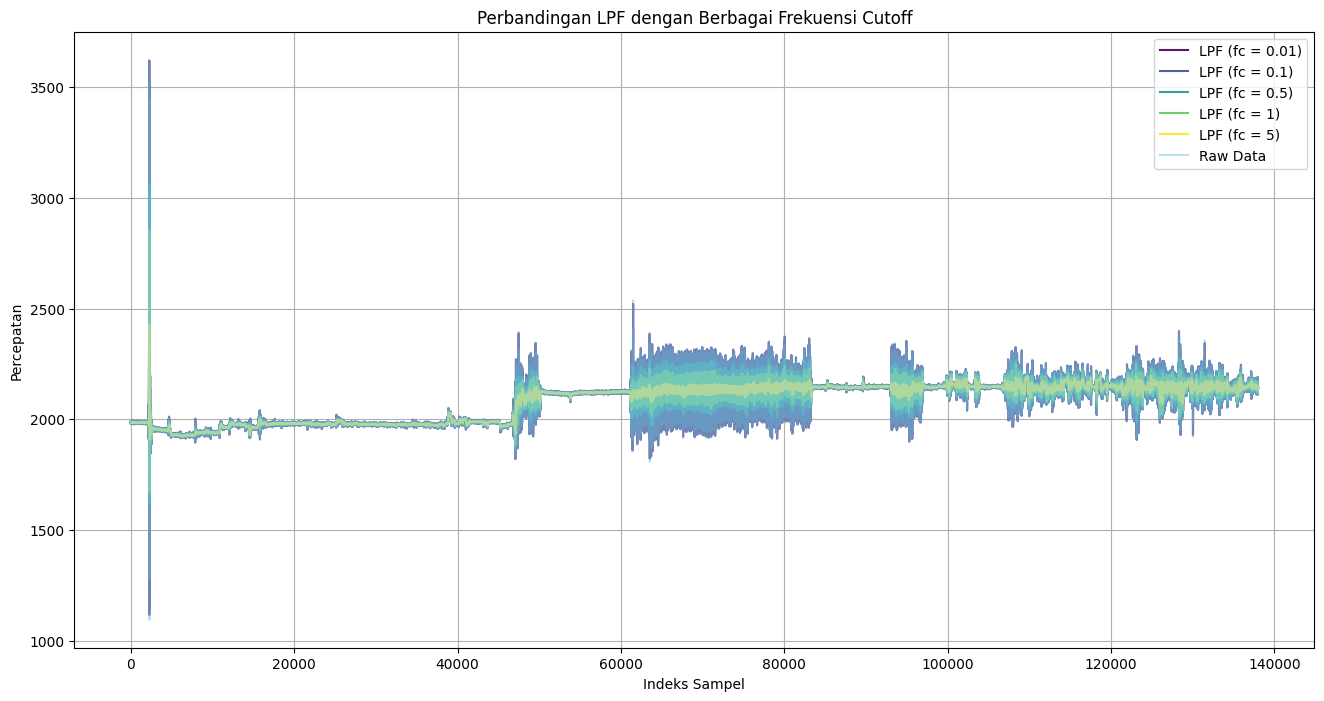

In [99]:
# Tentukan rentang frekuensi cutoff yang akan diuji
frekuensi_cutoff = [0.01, 0.1, 0.5, 1, 5]

# Buat palet warna yang berbeda
colors = plt.cm.viridis(np.linspace(0, 1, len(frekuensi_cutoff)))

# Buat subplot untuk setiap frekuensi cutoff
plt.figure(figsize=(16, 8))

for i, fc in enumerate(frekuensi_cutoff):
    lpf_filtered = [Data_Kolom_2[0]]
    alpha = 1 / (1 + 2 * np.pi * fc)  # Hitung alpha berdasarkan frekuensi cutoff
    for j in range(1, len(Data_Kolom_2)):
        lpf_filtered.append(alpha * Data_Kolom_2[j] + (1 - alpha) * lpf_filtered[-1])
    lpf_filtered = np.array(lpf_filtered)

    plt.plot(lpf_filtered, label=f"LPF (fc = {fc})", color=colors[i], alpha=0.9)

plt.plot(Data_Kolom_2, label="Raw Data", color="skyblue", alpha=0.6)
plt.xlabel("Indeks Sampel")
plt.ylabel("Percepatan")
plt.title("Perbandingan LPF dengan Berbagai Frekuensi Cutoff")
plt.legend()
plt.grid(True)
plt.show()


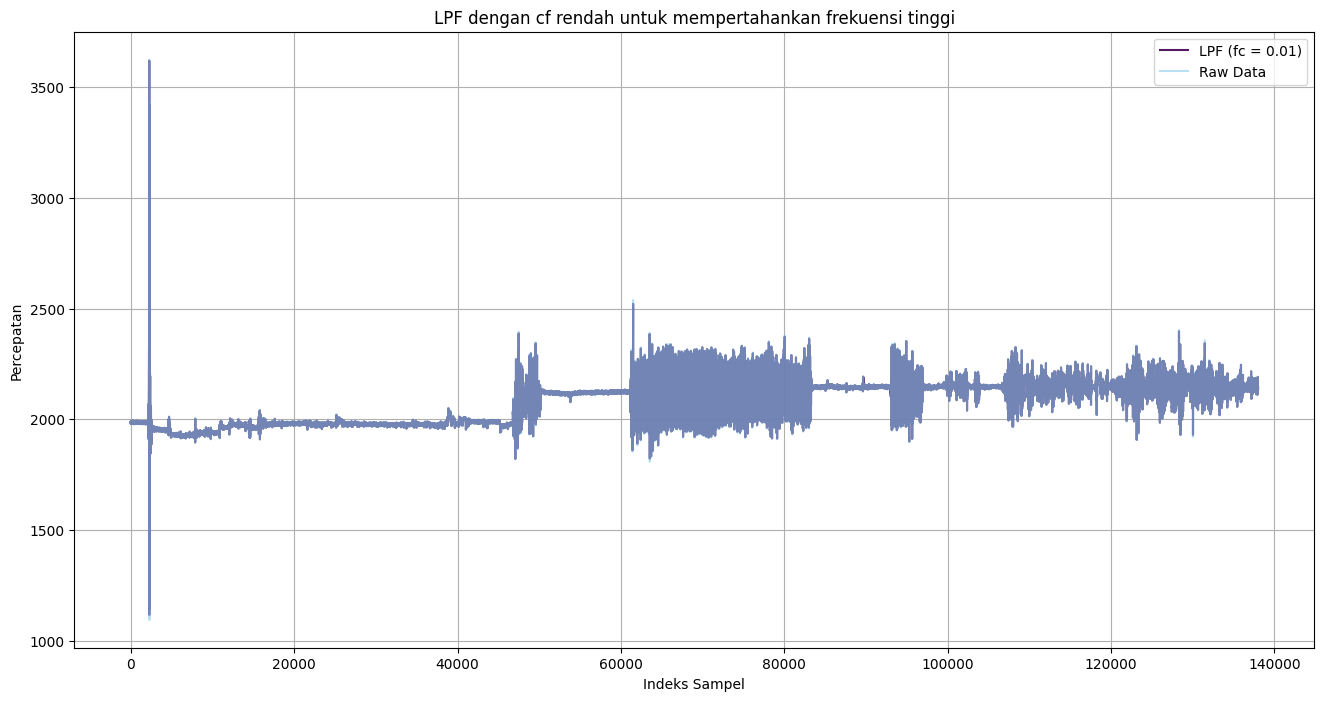

In [101]:
# Tentukan rentang frekuensi cutoff yang akan diuji
frekuensi_cutoff = [0.01]

# Buat palet warna yang berbeda
colors = plt.cm.viridis(np.linspace(0, 1, len(frekuensi_cutoff)))

# Buat subplot untuk setiap frekuensi cutoff
plt.figure(figsize=(16, 8))

for i, fc in enumerate(frekuensi_cutoff):
    lpf_filtered = [Data_Kolom_2[0]]
    alpha = 1 / (1 + 2 * np.pi * fc)  # Hitung alpha berdasarkan frekuensi cutoff
    for j in range(1, len(Data_Kolom_2)):
        lpf_filtered.append(alpha * Data_Kolom_2[j] + (1 - alpha) * lpf_filtered[-1])
    lpf_filtered = np.array(lpf_filtered)

    plt.plot(lpf_filtered, label=f"LPF (fc = {fc})", color=colors[i], alpha=0.9)

plt.plot(Data_Kolom_2, label="Raw Data", color="skyblue", alpha=0.6)
plt.xlabel("Indeks Sampel")
plt.ylabel("Percepatan")
plt.title("LPF dengan cf rendah untuk mempertahankan frekuensi tinggi")
plt.legend()
plt.grid(True)
plt.show()


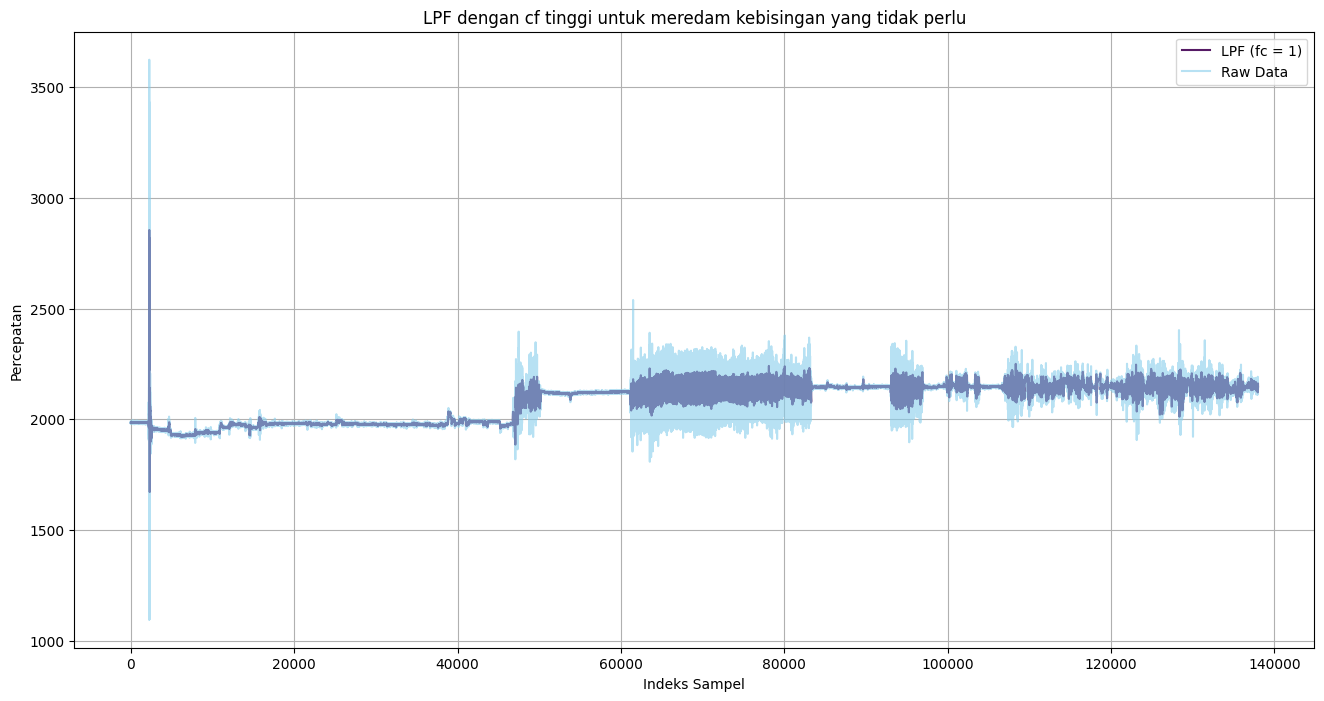

In [104]:
# Tentukan rentang frekuensi cutoff yang akan diuji
frekuensi_cutoff = [1]

# Buat palet warna yang berbeda
colors = plt.cm.viridis(np.linspace(0, 1, len(frekuensi_cutoff)))

# Buat subplot untuk setiap frekuensi cutoff
plt.figure(figsize=(16, 8))

for i, fc in enumerate(frekuensi_cutoff):
    lpf_filtered = [Data_Kolom_2[0]]
    alpha = 1 / (1 + 2 * np.pi * fc)  # Hitung alpha berdasarkan frekuensi cutoff
    for j in range(1, len(Data_Kolom_2)):
        lpf_filtered.append(alpha * Data_Kolom_2[j] + (1 - alpha) * lpf_filtered[-1])
    lpf_filtered = np.array(lpf_filtered)

    plt.plot(lpf_filtered, label=f"LPF (fc = {fc})", color=colors[i], alpha=0.9)

plt.plot(Data_Kolom_2, label="Raw Data", color="skyblue", alpha=0.6)
plt.xlabel("Indeks Sampel")
plt.ylabel("Percepatan")
plt.title("LPF dengan cf tinggi untuk meredam kebisingan yang tidak perlu")
plt.legend()
plt.grid(True)
plt.show()

# 3. Berapa ukuran jendela yang di gunakan dalam MVA ? (pilih 3 ukuran jendela yang berbeda, lalu plot dan bandingkan hasilnya). Ukuran jendela mana yang memberikan plot data yang lebih halus ? Mengapa ?

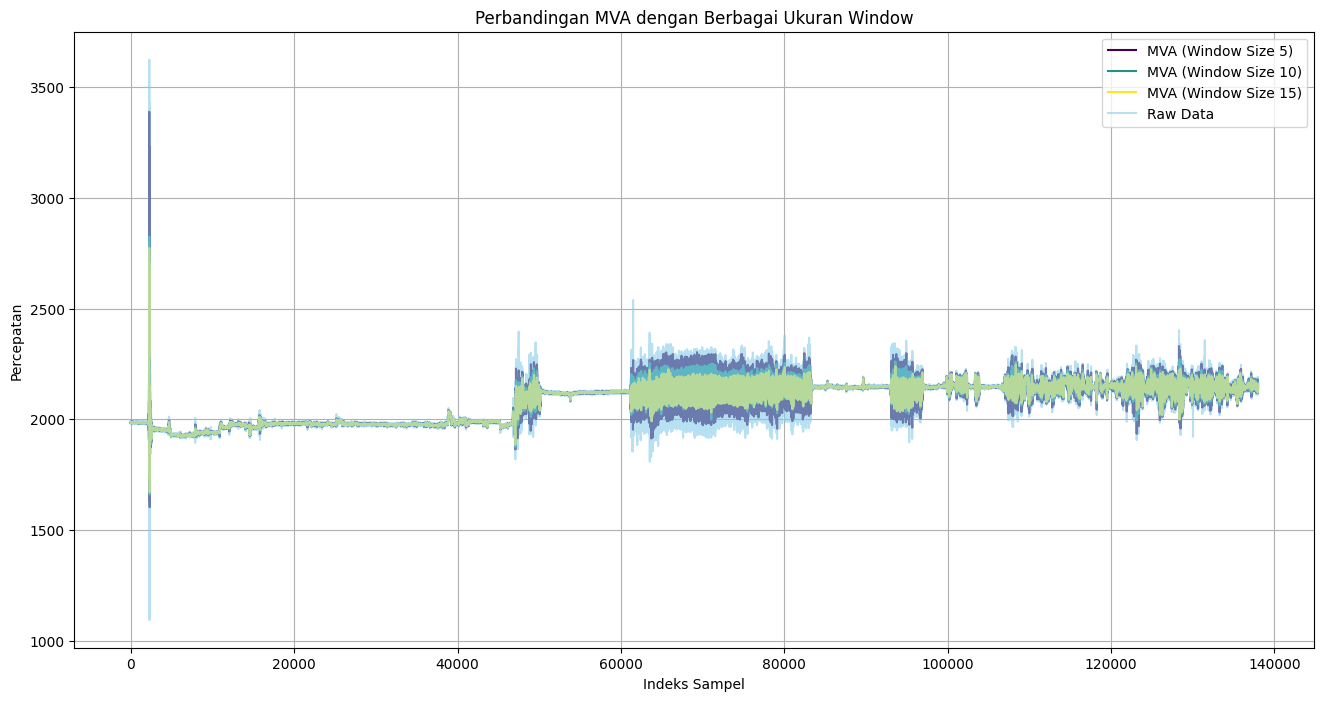

In [109]:
window_sizes = [5, 10, 15]
# Buat palet warna yang berbeda
colors = plt.cm.viridis(np.linspace(0, 1, len(window_sizes)))

plt.figure(figsize=(16, 8))

for i, window_size in enumerate(window_sizes):
    mva_filtered = Data_Kolom_2.rolling(window=window_size, min_periods=1).mean()

    plt.plot(mva_filtered, label=f"MVA (Window Size {window_size})", color=colors[i])

plt.plot(Data_Kolom_2, label="Raw Data", color="skyblue", alpha=0.6)
plt.xlabel("Indeks Sampel")
plt.ylabel("Percepatan")
plt.title("Perbandingan MVA dengan Berbagai Ukuran Window")
plt.legend()
plt.grid(True)
plt.show()


Ukuran window yang dipilih adalah 5, 10, dan 15. Adapun window yang memberikan plot data yang paling smooth adalah window 15. Hal ini dikarenakan MVA memperlakukan data dalam interval yang lebih luas, yang pada gilirannya mengurangi fluktuasi dan noise yang ada dalam sinyal.